# Relaxation With Linear Algebra

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Converting Relaxation Into Linear Algebra

Before proceeding to higher dimensions, where relaxation methods are more valuable, we will work out another way of formulating the relaxation problem. The idea is to observe that the discrete Laplace equations we found can be turned into a linear system of equations, which can be solved very efficiently using linear algebra. 

Consider the 4-point lattice shown below:

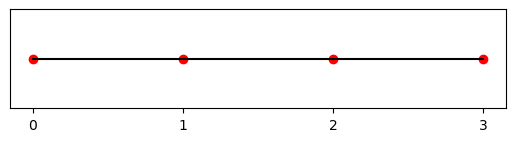

In [3]:
latticepts = np.linspace(0,3,4) #Setup the points of the discretization
yvals = np.zeros_like(latticepts) #In 1D give them no y heights

fig, ax = plt.subplots() #Setup figure

ax.plot(latticepts,yvals,"ro",latticepts, yvals, '-k') #Make plot

ratio = 0.2 #The next few lines adjust the aspect ratio for our 1D plot
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

plt.xticks(latticepts) #Show ticks and labels at all lattice pts
plt.tick_params(left = False, labelleft = False) #Remove vertical ticks/labels

plt.show()

Fix the boundary values $V_0$ and $V_3$ for the potential on this lattice. There are then only two unknowns $V_1$ and $V_2$. The discrete Laplace equation from last time,

$$
V_i = (V_{i-1}+V_{i+1})/2,
$$

gives two equations for these unknowns. Explicitly, these are

$$
V_1 = (V_{0}+V_{2})/2 \qquad \text{and} \qquad V_2 = (V_{1}+V_{3})/2.
$$

Putting all the unknowns, $V_1$ and $V_2$, on the left side of these equations and the knowns on the right we arrive at the system of equations:

$$
\begin{aligned}
2V_1-V_2 &= V_0\\
-V_1+2V_2 &= V_3.
\end{aligned}
$$

Which, in turn can be written as a matrix equation

$$
\begin{pmatrix}
2 & -1\\
-1 & 2
\end{pmatrix} 
\begin{pmatrix}
V_1\\
V_2
\end{pmatrix} =
\begin{pmatrix}
V_0\\
V_3
\end{pmatrix}.
$$

This equation can be solved by multiplying both sides of the equation by the inverse of the matrix. For a 2X2 matrix

$$
M=\begin{pmatrix}
a & b\\
c & d
\end{pmatrix},
$$

the inverse matrix is 

$$
M^{-1} = \frac{1}{\det M} \begin{pmatrix}
d & -b\\
-c & a
\end{pmatrix}.
$$

For the present problem this yields
$$
\begin{pmatrix}
V_1\\
V_2
\end{pmatrix} =\frac{1}{3}
\begin{pmatrix}
2 & 1\\
1 & 2
\end{pmatrix} 
\begin{pmatrix}
V_0\\
V_3
\end{pmatrix},
$$
or more explicitly 
$$
V_1 = \frac{2}{3}V_{0}+\frac{1}{3}V_{3} \qquad \text{and} \qquad V_2 = \frac{1}{3}V_{0}+\frac{2}{3} V_{3}.
$$
We've solved the discrete Laplace equation on the 4-point lattice by hand. The key to this being a simple calculation, with no need for numerics, was that we had an easy to use formula for the inverse of the 2X2 matrix. 

## NumPy's Linear Algebra Package

For lattices with 5 and more points, the necessary matrix manipulations are more complicated. For this reason we will use NumPy's linear algebra package. Below are illustrations for loading the package, defining a 3X3 matrix, taking the determinant and inverse of that matrix, and multiplying a vector by it:

In [3]:
import numpy.linalg as linalg

In [5]:
M = np.zeros([3,3])

# Set the neighbors to the diagonal to 1
M[0,1]=1
M[1,0]=1
M[1,2]=1
M[2,1]=1

# Set the diagonals to -4
for i in range(3): 
    M[i, i] = -4
    
print(M)

[[-4.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1. -4.]]


In [6]:
linalg.det(M)

-56.00000000000002

In [9]:
Minv=linalg.inv(M)
print(Minv)

print(np.matmul(M,Minv)) #or, more briefly:
M@Minv

[[-0.26785714 -0.07142857 -0.01785714]
 [-0.07142857 -0.28571429 -0.07142857]
 [-0.01785714 -0.07142857 -0.26785714]]
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-6.9388939e-18  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-6.9388939e-18,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [8]:
# define a vector
v=np.array([1,-1,4])

print(np.matmul(M,v)) #or
M@v

[ -5.   9. -17.]


array([ -5.,   9., -17.])

<b> Exercise (a):</b> Take the 5-point lattice [-2,-1,0,1,2] as an example. Fix the boundary values to $V_{-2}=3$ and $V_{2}=-1$ and use linear algebra to solve the relaxation problem. Procceed by hand up until you have setup the matrix problem, but use Python code to invert the matrix and solve the linear system of equations.  

<b> Exercise (b):</b> Write a function called RelaxLinAlg1D that implements this strategy for an arbitrary number of lattices points $N$.

## Timing Code

Python allows you to time how long your code takes to run. When you write code that has to repeat a calculation many times, for example by running it on a lattice with a large number of points N, it is important that your code does these calculations as efficiently as possible. This snippet allows you to test a code block's duration:

In [ ]:
import time

t0 = time.time()
code_block
t1 = time.time()

total = t1-t0

<b>Exercise (c):</b> Between the previous notebook and this one you have written two functions both of which implement the method of relaxation. Which of them is more efficient? You should investigate this question not just for one lattice size, but also check what happens as the lattice gets bigger and bigger. 

<b>Warning:</b> The method of <b>Exercise (c)</b> is important to know about. However, you should take the answer that you find with a grain of salt. Many human hours have been put into optimizing the linalg package, while we spent little time optimizing the iterative scheme. In fact, the two different approaches have different regimes where they are most useful; a deeper investigation of their respective strengths would be an excellent research project.